# Overfitting and underfitting

## Simulate data 

$y = a_0 + a_1x + a_2x^2 + \epsilon$

$\epsilon \sim \mathcal{N}(0,1)$ (The error is standard normal distributed)

In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

samples = 100
X = np.random.uniform(-3,3, (samples, 1))
X.shape


(100, 1)

In [284]:
# a0 = 3, a1 = 0.5, a2 = 1
f = lambda x: x**2 + 0.5*x + 3
# y = a0 + a1x + a2x^2 + epsilon
y = f(X)+ np.random.randn(samples, 1)



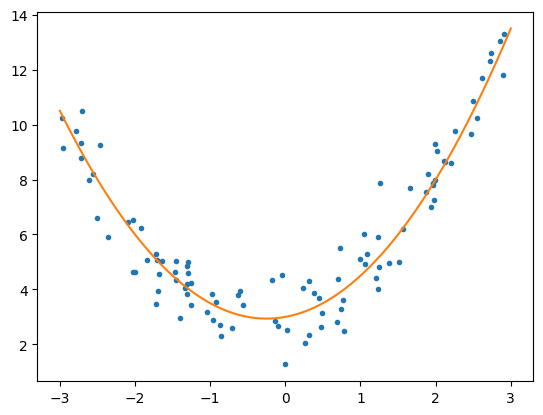

In [285]:
#linspace gives equally spaced numbers between low and high
# between - 3 and 3 we get 100 equally spaced numbers
x = np.linspace(-3,3, samples)

plt.plot(X,y, '.')
plt.plot(x, f(x))

<Axes: title={'center': '$y = x^2+0.5x+3+\\epsilon$'}>

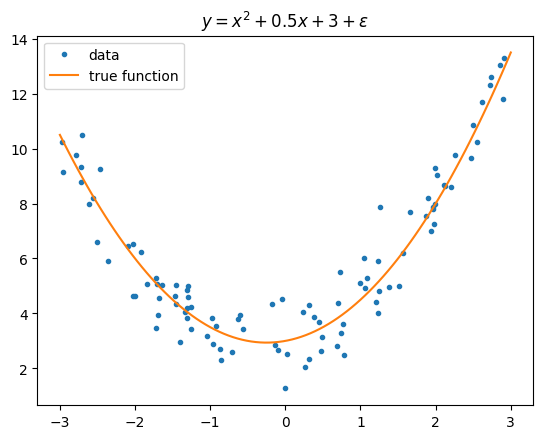

In [286]:
def draw_data():
    fig, ax = plt.subplots()
    ax.plot(X,y, '.', label="data")
    ax.plot(x, f(x), label= "true function")
    ax.set(title = r"$y = x^2+0.5x+3+\epsilon$")
    ax.legend()
    
    return ax
    
    
draw_data()

## Polynomial regression

In [287]:
from sklearn.preprocessing import PolynomialFeatures

# include_bias = True -> a column of 1s are included , and if false its excluded
# we use false as LinearRegression() handles the bias
# instansiate a PolynomialFeatures instance from the PolynomialFeatures class

poly = PolynomialFeatures(degree=2, include_bias=False)

In [288]:
poly

PolynomialFeatures(include_bias=False)

In [289]:
# from X had [x1] -> now it has [x1 x1^2]
poly_features = poly.fit_transform(X)
poly_features[:5], poly_features.shape 

(array([[ 0.38245493,  0.14627177],
        [ 1.56258521,  2.44167254],
        [-1.31082491,  1.71826195],
        [ 2.11491734,  4.47287535],
        [-0.55791358,  0.31126756]]),
 (100, 2))

In [290]:
2.97353325**2, (-0.58122436)**2

(8.841899988855562, 0.3378217566574096)

### Train on transfomed dataset

- use multiple linear regression on our polynomial features
- this gives us polynomial regression of second order 

In [291]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(poly_features, y)

# estimated: a1, a2 from data, note that true data was a1 = 0.5 , a2= 1
model.coef_

array([[0.56948313, 0.99448526]])

In [292]:
#estimated a0 from data, note that true a0 = 3
model.intercept_

array([3.01213193])

### Visualise true model and estimated model

In [293]:
x[:5], x.shape

(array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576]),
 (100,))

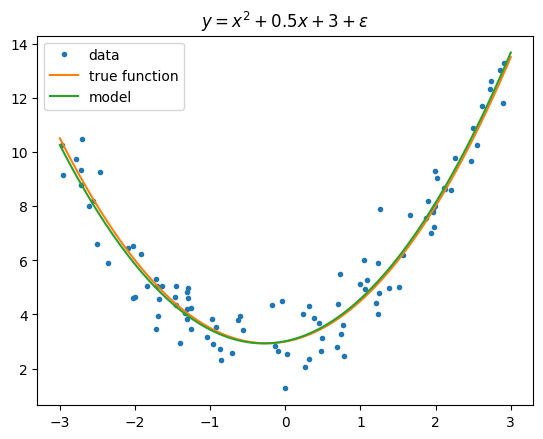

In [294]:

x_poly_features = poly.transform(x.reshape(-1,1))
y_pred = model.predict(x_poly_features)

ax = draw_data()
ax.plot(x, y_pred, label="model")
ax.legend()

## underfitting

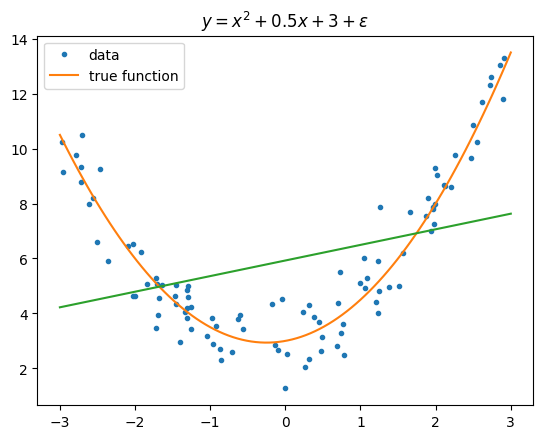

In [295]:
model = LinearRegression()
# we haven't transformed the feature space, so we got a linear model
model.fit(X,y)
ax = draw_data()
ax.plot(x, model.predict(x.reshape(-1,1)))

## overfitting

In [296]:
poly_model_30 = PolynomialFeatures(30, include_bias=False)

X_features = poly_model_30.fit_transform(X)
X_features.shape

(100, 30)

In [297]:
x_poly_features = poly_model_30.transform(x.reshape(-1,1))
x_poly_features.shape

(100, 30)

[(-1.0, 15.0), Text(0.5, 1.0, 'Overfitted model')]

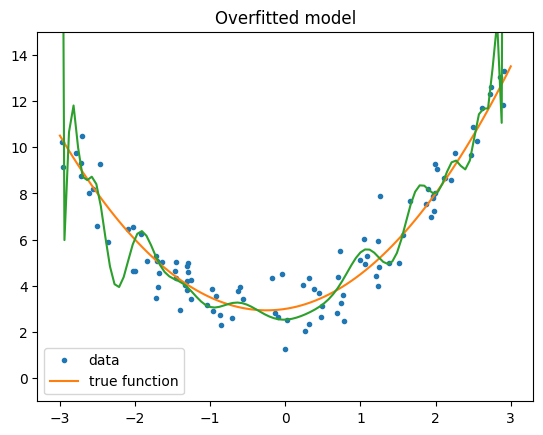

In [298]:
model = LinearRegression()
model.fit(X_features, y)
y_pred = model.predict(x_poly_features)

ax = draw_data()
ax.plot(x, y_pred)
ax.set(ylim=[-1,15], title="Overfitted model")



## Choose a model

In [299]:
# simulate new data

samples = 10000
X = np.random.uniform(-3,3, (samples, 1))
X.shape

(10000, 1)

In [300]:
f = lambda X: x**4 + x**2 +.5*x + 3
y = f (X) + np.random.randn(samples, 1)
y.shape

(10000, 100)

### Train|Validation|Test split

split dataset into
 - train - train on training set
 - validation - tune hyperparameter on validation test
 - test - evaluate on test set

in our case the degree is hyperparameter

In [301]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.33, random_state=42)

# Use test and take half of it to use as tet and half as validation
X_val, X_test, y_val, y_test = train_test_split(
         X_test, y_test, test_size=0.5, random_state=42)

# 2/3 train -> 6700
# 1/3/2 val -> 1650
# 1/3/2 test -> 1650

X_train.shape, X_val.shape, X_test.shape

((6700, 1), (1650, 1), (1650, 1))

### Train model and predict validation

In [302]:
from sklearn.metrics import mean_squared_error

RMSE_val = []

for degree in range(1,100):
    model_poly = PolynomialFeatures(degree, include_bias=False)
    # Feature engineering -> transform feature space
    train_features = model_poly.fit_transform(X_train)
    val_features = model_poly.fit_transform(X_val)

    model_linear_regression = LinearRegression()
    #polynomial regression - trains on transfomred feature space
    model_linear_regression.fit(train_features, y_train)

    y_pred_val = model_linear_regression.predict(val_features)
    RMSE_val.append(np.sqrt(mean_squared_error(y_val, y_pred_val)))

RMSE_val

[0.9833076723550578,
 0.9829001079615325,
 0.982951993142355,
 0.9825765492374668,
 0.9826046124308129,
 0.9824907388742932,
 0.982412462795854,
 0.9825202479519364,
 0.9839514395717912,
 0.9830143865961213,
 0.9829957221462878,
 0.9830401211417934,
 0.9830508378426152,
 0.9836192218316407,
 0.9838746586453916,
 0.9840402518441262,
 0.9838687512910271,
 0.9838699288521057,
 0.9837613097767995,
 0.9838683755692117,
 0.9838687104927104,
 0.9838770723009456,
 0.9843857302068885,
 0.9844736064978136,
 0.9844562738922092,
 0.9842765563274449,
 0.984304218462652,
 0.9844642486837034,
 0.9837536111756309,
 0.9856329174600317,
 0.9824291990385801,
 0.98871384220885,
 0.9847759443136588,
 0.9847677364193888,
 0.9848781303513358,
 0.9842731838195381,
 0.9841934964786975,
 0.983791943288423,
 0.9839087524000503,
 0.9834903871715502,
 0.9834040279405571,
 0.9831888491369409,
 0.9831333802976382,
 0.983039189005768,
 0.9830243608113529,
 0.9830747764709056,
 0.9829974444011915,
 0.9831178357507134,

[Text(0.5, 0, 'degree'),
 Text(0, 0.5, 'RMSE'),
 Text(0.5, 1.0, 'RMSE on validation data for different degres of polynomials')]

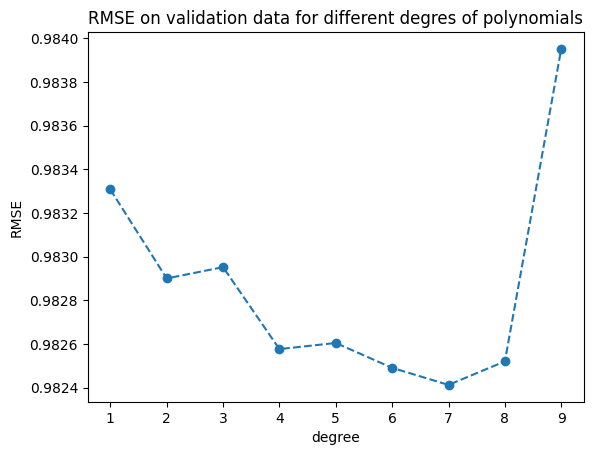

In [303]:
fig, ax = plt.subplots()
ax.plot(range(1,10), RMSE_val[:9], '--o')
ax.set(xlabel="degree", 
       ylabel="RMSE", 
       title="RMSE on validation data for different degres of polynomials")


## TODO for reader:

- use degree 4 and train on training data + validation data
- evaluate on test data -> se previous lecture